# Contrastes de Bondad de Ajuste

## Introducción

Los contrastes de bondad de ajuste permiten verificar si una muestra de datos proviene de una distribución teórica especificada. En este notebook exploraremos dos de los tests más comunes:

- **Prueba de Kolmogorov-Smirnov (K-S):** útil para contrastar una muestra continua contra una distribución teórica.
- **Prueba de Chi-cuadrado (χ²):** adecuada para comparar frecuencias observadas con frecuencias esperadas en datos categóricos o agrupados.

A continuación se presentan algunos ejercicios que ilustran cómo aplicar estos tests en Python.



### Fundamento Teórico

#### Prueba de Kolmogorov-Smirnov (K-S)
La prueba K-S compara la función de distribución empírica de una muestra con una función de distribución teórica continua especificada (por ejemplo, normal, exponencial). Evalúa la mayor diferencia absoluta entre ambas funciones acumuladas:

$$ D = \sup_x |F_n(x) - F(x)| $$

Donde $ F_n(x) $ es la función de distribución empírica de la muestra y $ F(x) $ es la función de distribución teórica. Si esta diferencia es suficientemente grande (según el valor-p), se rechaza la hipótesis nula de que los datos provienen de la distribución especificada.

#### Prueba de Chi-cuadrado ($\chi^2$)
Este contraste se usa cuando los datos están agrupados en categorías o intervalos. Compara las frecuencias observadas con las frecuencias esperadas según la distribución teórica. El estadístico se calcula como:

$$ \chi^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i} $$

Donde $ O_i $ y $ E_i $ son las frecuencias observadas y esperadas, respectivamente. Si el estadístico es suficientemente grande, se rechaza la hipótesis nula de que los datos siguen la distribución propuesta.

**Nota**: Esta prueba requiere que las frecuencias esperadas sean suficientemente grandes (típicamente mayores a 5) para que la aproximación $\chi^2$ sea válida.

A continuación se presentan algunos ejercicios que ilustran cómo aplicar estos tests en Python.

In [3]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt
import seaborn as sns

<strong> Ejercicio 1: </strong>   <font color='blue'> (Prueba de Kolmogorov-Smirnov para distribución normal):

* Genera una muestra aleatoria de tamaño 100 de una distribución normal estándar.
* Usa la prueba de Kolmogorov-Smirnov para contrastar si los datos provienen de una distribución normal.
</font> 

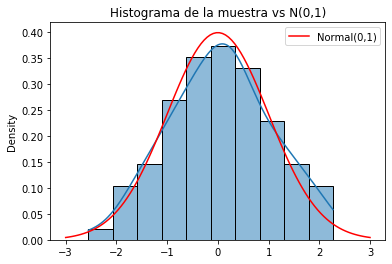

Ejercicio 1: K-S para N(0,1)
Estadístico K-S: 0.0582
Valor-p: 0.8866



In [7]:
np.random.seed(0)
sample = np.random.normal(loc=0, scale=1, size=100)

# Visualización
sns.histplot(sample, kde=True, stat="density", bins=10)
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x, 0, 1), label="Normal(0,1)", color="red")
plt.title("Histograma de la muestra vs N(0,1)")
plt.legend()
plt.show()

ks_stat, p_value = kstest(sample, 'norm', args=(0, 1))

print("Ejercicio 1: K-S para N(0,1)")
print(f"Estadístico K-S: {ks_stat:.4f}")
print(f"Valor-p: {p_value:.4f}\n")

<strong> Ejercicio 2:</strong> <font color='blue'> Prueba K-S para distribución exponencial
* Simula 100 datos de una exponencial con parámetro lambda = 2.
* Ajusta la muestra a una exponencial y aplica la prueba de Kolmogorov-Smirnov.
</font>

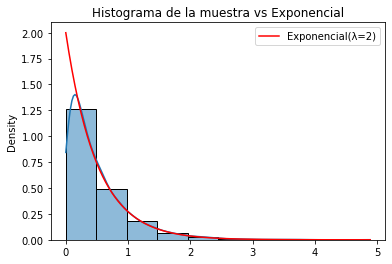

Ejercicio 2: K-S para exponencial ajustada
Estadístico K-S: 0.0094
Valor-p: 0.7648



In [15]:
from scipy.stats import expon

# np.random.seed(1)
# sample = np.random.exponential(scale=1/2, size=100)
#
X=expon(scale=1/2)

sample = X.rvs(5000)
# Visualización
sns.histplot(sample, kde=True, stat="density", bins=10)
x = np.linspace(0, np.max(sample), 100)
plt.plot(x, expon.pdf(x, scale=1/2), label="Exponencial(λ=2)", color="red")
plt.title("Histograma de la muestra vs Exponencial")
plt.legend()
plt.show()

loc, scale = expon.fit(sample)
ks_stat, p_value = kstest(sample, 'expon', args=(loc, scale))

print("Ejercicio 2: K-S para exponencial ajustada")
print(f"Estadístico K-S: {ks_stat:.4f}")
print(f"Valor-p: {p_value:.4f}\n")


<strong> Ejercicio 3:</strong> <font color='blue'> Prueba de chi-cuadrado para uniformidad

* Genera una muestra uniforme en [0,1] y verifica mediante una prueba de chi-cuadrado si la distribución es uniforme, agrupando los datos en 5 intervalos.
</font>


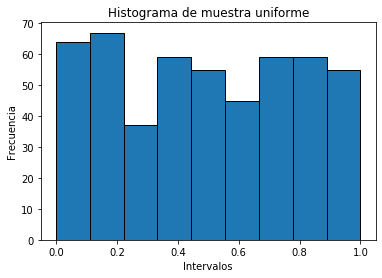

Ejercicio 3: Chi-cuadrado para uniforme
Chi²: 12.4960
Valor-p: 0.1304



In [1]:
from scipy.stats import uniform, chisquare
import numpy as np
import matplotlib.pyplot as plt

# Generate uniform sample
X = uniform(0, 1)
sample = X.rvs(500)

# Define bins
bins = np.linspace(0, 1, 10)  # 9 bins
observed_freq, _ = np.histogram(sample, bins=bins)

# Expected frequencies (uniform distribution)
expected_freq = np.full_like(observed_freq, len(sample)/len(observed_freq))

# Force totals to match exactly
expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())

# Visualization
plt.hist(sample, bins=bins, edgecolor="black")
plt.title("Histograma de muestra uniforme")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia")
plt.show()

# Chi-square test
chi2_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)

print("Ejercicio 3: Chi-cuadrado para uniforme")
print(f"Chi²: {chi2_stat:.4f}")
print(f"Valor-p: {p_value:.4f}\n")


## Ejercicio 4: Comparar muestra de Poisson con una normal

# Enunciado:
# Compara una muestra generada de una distribución de Poisson con una normal estándar.
# Se espera un mal ajuste y que se rechace la hipótesis nula.

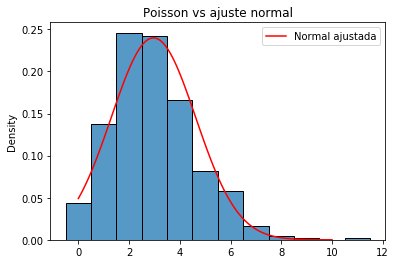

Ejercicio 4: K-S para muestra de Poisson vs Normal
Estadístico K-S: 0.1609
Valor-p: 0.0000


In [23]:
from scipy.stats import poisson

X=poisson(3)

sample = X.rvs(500)

#np.random.seed(3)
#sample = np.random.poisson(lam=3, size=100)

# Visualización
sns.histplot(sample, kde=False, stat="density", bins=range(0, 10), discrete=True)
x = np.linspace(0, 10, 100)
plt.plot(x, norm.pdf(x, np.mean(sample), np.std(sample)), label="Normal ajustada", color="red")
plt.title("Poisson vs ajuste normal")
plt.legend()
plt.show()

ks_stat, p_value = kstest(sample, 'norm', args=(np.mean(sample), np.std(sample)))

print("Ejercicio 4: K-S para muestra de Poisson vs Normal")
print(f"Estadístico K-S: {ks_stat:.4f}")
print(f"Valor-p: {p_value:.4f}")
